In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [2]:
# loading the dataset 
df = pd.read_csv("C:\\Users\\itsme\\Downloads\\pcos_dataset.csv")
df.head(10)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
5,38,19.3,0,28.4,6,0
6,24,20.2,1,72.5,29,0
7,43,20.2,1,85.8,17,0
8,36,20.6,0,50.4,5,0
9,40,20.4,0,82.0,21,0


In [3]:
#checking the last 10 columns
df.tail(10)

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
990,21,20.9,0,68.8,14,0
991,27,30.5,0,45.0,13,0
992,41,32.7,0,41.7,24,0
993,34,21.7,1,67.8,12,0
994,27,19.6,1,89.3,14,0
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0
999,22,21.9,1,78.9,7,0


In [4]:
df.shape

(1000, 6)

In [5]:
# description about the column
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [6]:
# information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [7]:
#checking the null value in the columns
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

# indication
# irregular menstrual cycles (0 = No, 1 = Yes)
# PCOS Diagnosis (binary):  (0 = No, 1 = Yes)

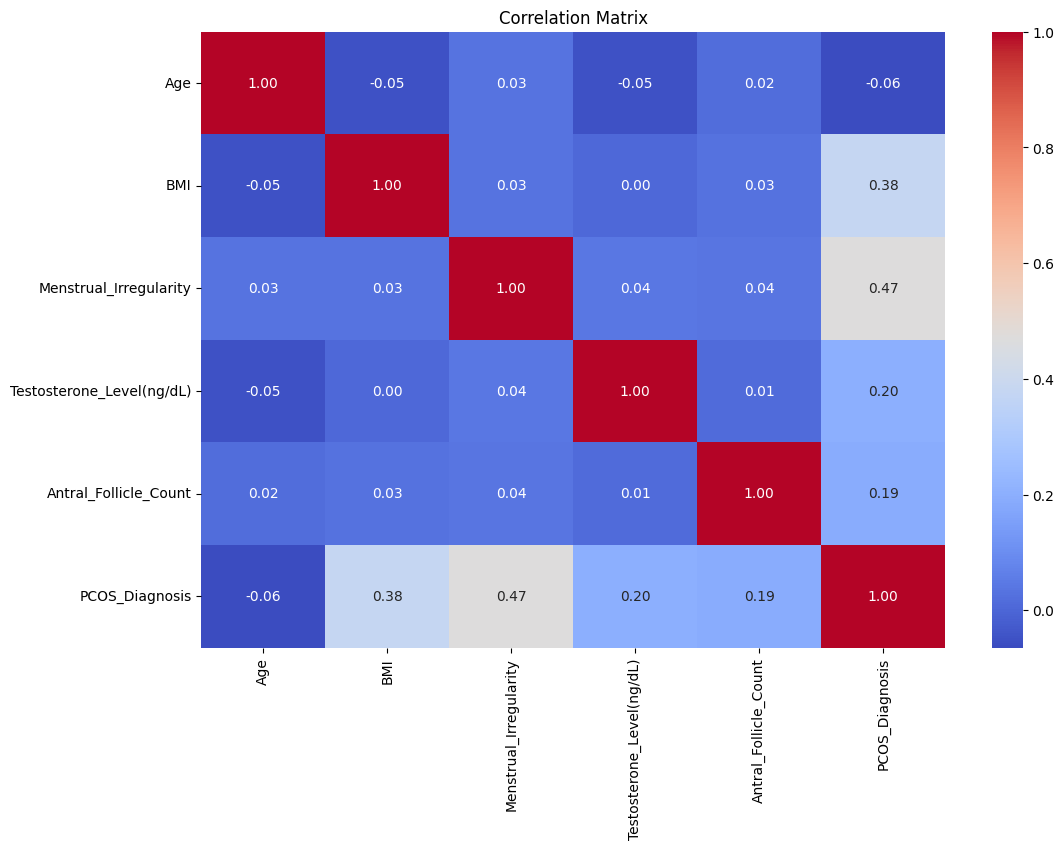

In [8]:
#checking the relation of different column with one another using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

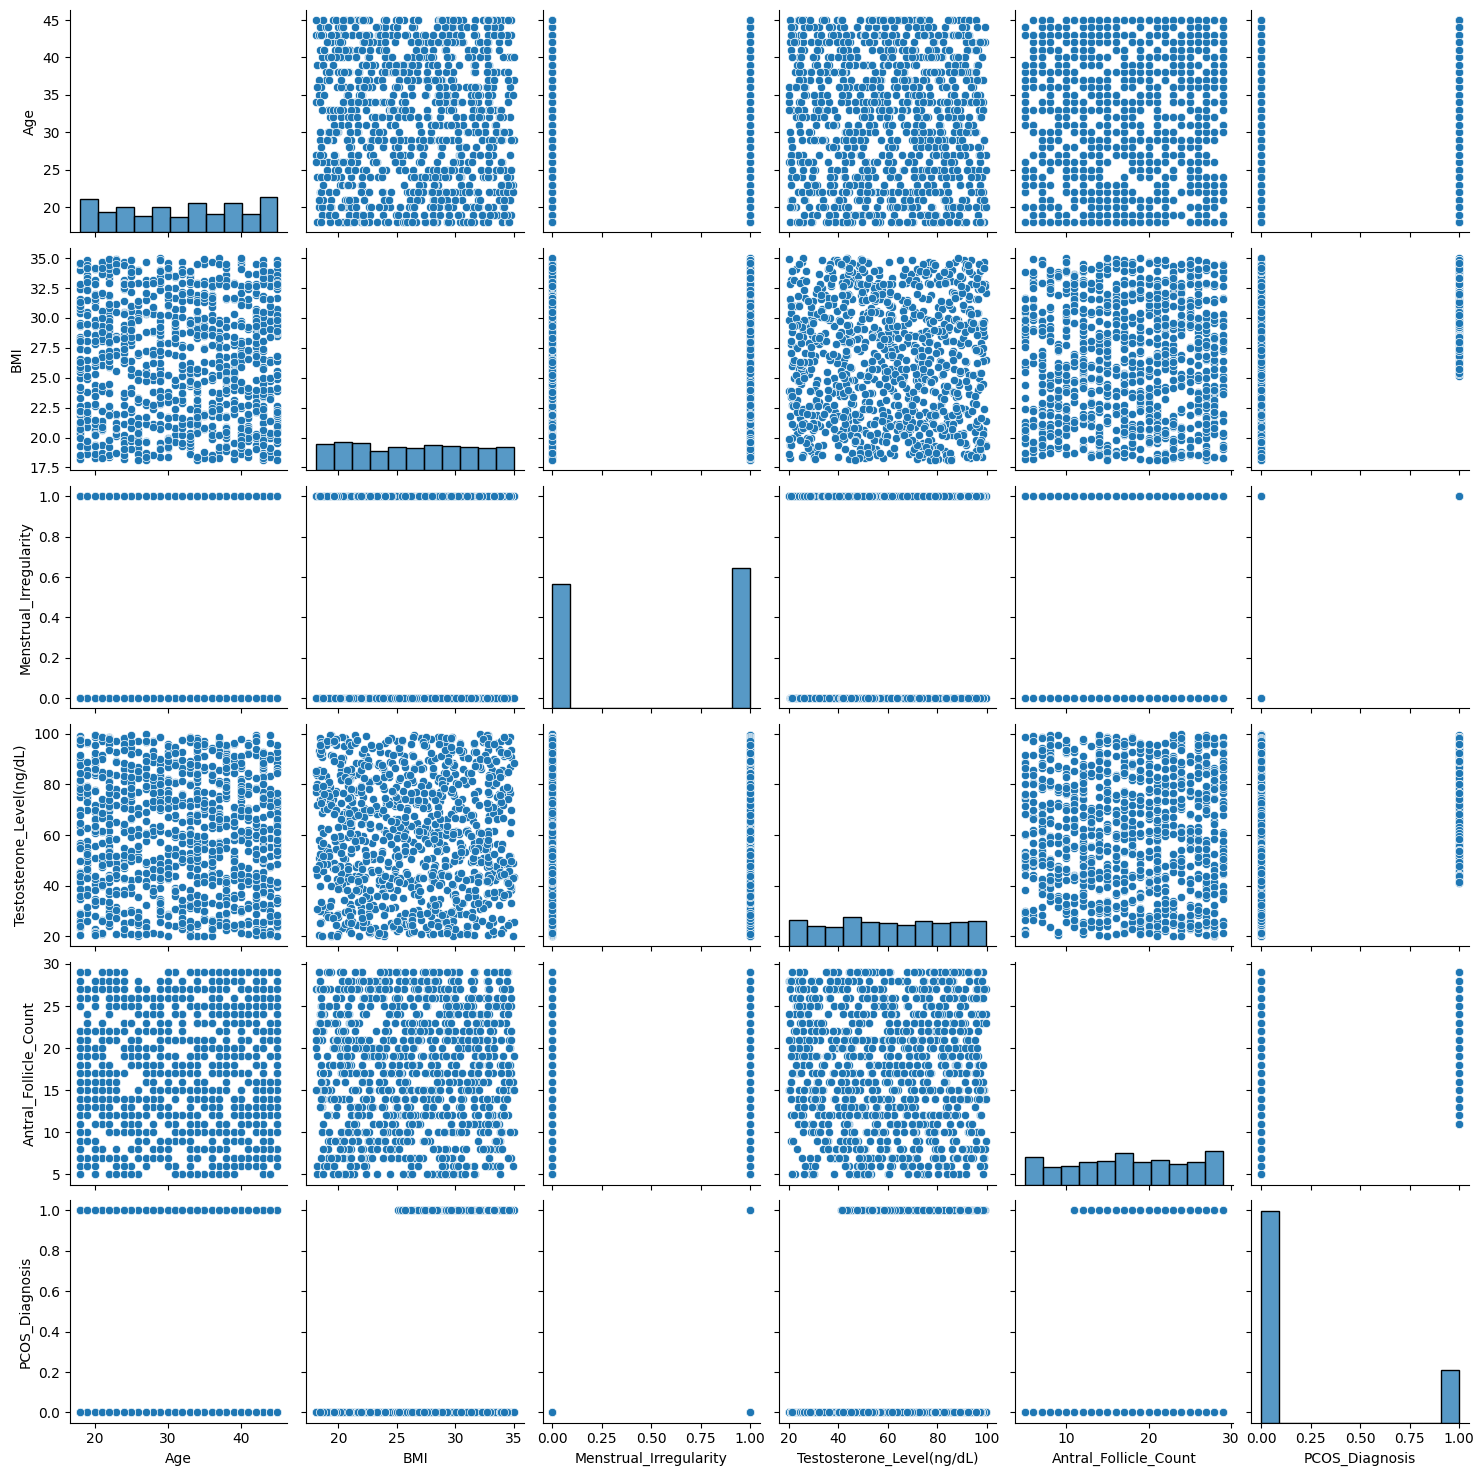

In [9]:
#visualizing the relationship of all columns with one another in the form of graph
sns.pairplot(df,markers='o',diag_kind="auto")
plt.show()

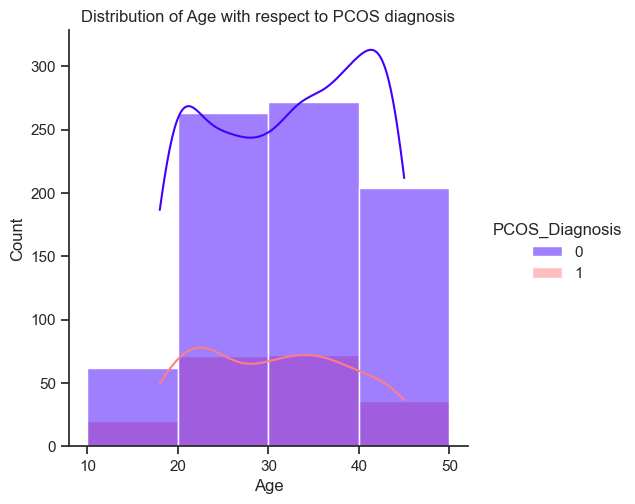

In [10]:
#visualizing the presence of disease in different age 
sns.set(style="ticks")
sns.displot(x="Age",data=df,hue="PCOS_Diagnosis",palette="gnuplot2",kde=True,bins=[10,20,30,40,50])
plt.title("Distribution of Age with respect to PCOS diagnosis")
plt.show()

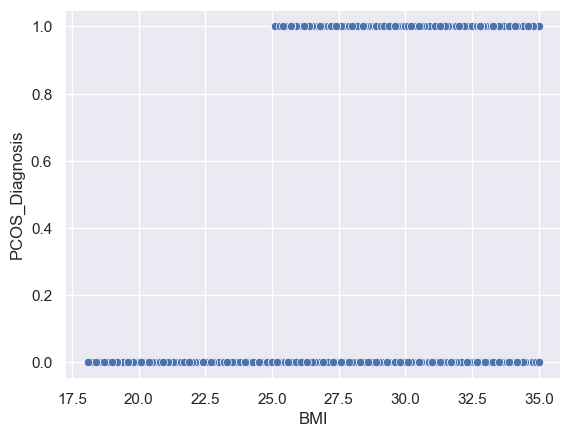

In [11]:
#visualizing how certain bmi would affect the pcos diagnosis
sns.set(style="darkgrid")
sns.scatterplot(x="BMI",y="PCOS_Diagnosis",data=df)
plt.show()

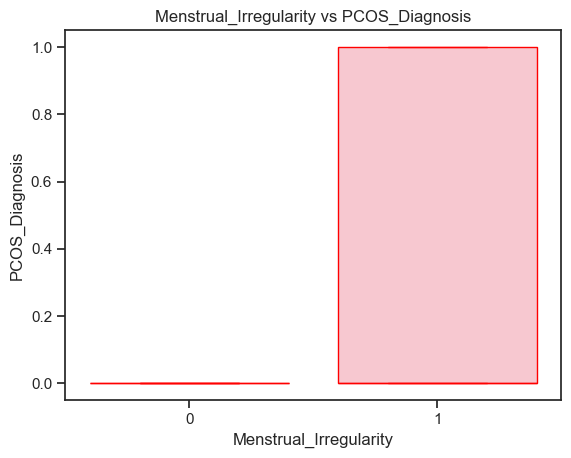

In [12]:
#visualizing the relation that how the menstrual iregularity would help in the diagnosis of pcos 
sns.set_style("ticks")
sns.boxplot(y="PCOS_Diagnosis",x="Menstrual_Irregularity",data=df,color="pink",linecolor="red")
plt.title("Menstrual_Irregularity vs PCOS_Diagnosis")
plt.show()

In [13]:
# separtion of the column into independent and dependent variable
X=df.iloc[:,:-1] #independent variable
y=df.iloc[:,-1] # dependent variable

In [14]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


## Logistic regression 

In [15]:
model_lr = LogisticRegression() # model prepartion

In [16]:
#setting up the  parameter 
parameter_lr={"penalty":['l1','l2','elasticnet'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
             'max_iter':[100,200,300]}

In [17]:
#cross validation process for better accuracy 
classifier_regressor=GridSearchCV(model_lr,param_grid=parameter_lr,scoring="accuracy",cv=5)

In [18]:
classifier_regressor.fit(X_train,y_train) #fitting the cross validation into the training set 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
                               2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [19]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Logistic Regression:", classifier_regressor.best_params_)
print("Best Score for Logistic Regression:", classifier_regressor.best_score_)

Best Parameters for Logistic Regression: {'C': 5, 'max_iter': 100, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.9213333333333333


In [20]:
# Predict the target values for the test set (X_test) using the trained model
y_pred = classifier_regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
#checking the accuracy score by analyzing the y_pred and y_test 
score = accuracy_score(y_pred,y_test)
score

0.892

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       207
           1       0.67      0.74      0.70        43

    accuracy                           0.89       250
   macro avg       0.81      0.83      0.82       250
weighted avg       0.90      0.89      0.89       250



## Randomforest Classifier

In [23]:
model_rf = RandomForestClassifier(random_state=42) # model preparation

In [24]:
#setting up the  parameter 
parameter_rf = {
    "n_estimators":[50,100,150,200],
    "max_depth":[5,8,10],
    "min_samples_split":[2,4,6,8,10],
    "min_samples_leaf":[2,4,5],
    "max_features":['auto', 'sqrt', 'log2']
}

In [25]:
#cross validation process for better accuracy
classifier_regressor_rf=GridSearchCV(model_rf,param_grid=parameter_rf,scoring="accuracy",cv=5)

In [26]:
classifier_regressor_rf.fit(X_train,y_train) #fitting the cross validation into the training set 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [27]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for RandomForestClassifier:", classifier_regressor_rf.best_params_)
print("Best Score for RandomForestClassifier:", classifier_regressor_rf.best_score_)

Best Parameters for RandomForestClassifier: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score for RandomForestClassifier: 1.0


In [28]:
# Predict the target values for the test set (X_test) using the trained model 
y_pred_rf = classifier_regressor_rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
#checking the accuracy score by analyzing the y_pred and y_test 
score = accuracy_score(y_pred_rf,y_test)
score

0.988

In [30]:
#classification_report 
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       205
           1       0.94      1.00      0.97        45

    accuracy                           0.99       250
   macro avg       0.97      0.99      0.98       250
weighted avg       0.99      0.99      0.99       250



## Support Vector Classifier 

In [31]:
model_svc = SVC()# model preparation

In [32]:
#setting up the  parameter
parameter_sc = {
    "C":[0.1,1,10],
    "kernel":["linear","rbf"],
    "gamma":["scale","auto"],
    "degree":[3,5]
}

In [33]:
#cross validation process for better accuracy
classifier_regressor_sc=GridSearchCV(model_svc,param_grid=parameter_sc,scoring="accuracy",cv=5)

In [34]:
classifier_regressor_sc.fit(X_train,y_train)  #fitting the cross validation into the training set 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [35]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for SVC:", classifier_regressor_sc.best_params_)
print("Best Score for SVC:", classifier_regressor_sc.best_score_)

Best Parameters for SVC: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.9200000000000002


In [36]:
# Predict the target values for the test set (X_test) using the trained model (classifier_regressor)
y_pred_sc = classifier_regressor_sc.predict(X_test)
y_pred_sc

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
#checking the accuracy score by analyzing the y_pred and y_test 
score=accuracy_score(y_pred_sc,y_test)
score

0.888

In [38]:
#classification_report 
print(classification_report(y_pred_sc,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       204
           1       0.69      0.72      0.70        46

    accuracy                           0.89       250
   macro avg       0.81      0.82      0.82       250
weighted avg       0.89      0.89      0.89       250



## XGboost

In [39]:
model_xgb = XGBClassifier(random_state=42)# model preparation

In [40]:
#setting up the  parameter
parameter_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]}


In [41]:
#cross validation process for better accuracy
classifier_regressor_xgb=GridSearchCV(model_xgb,param_grid=parameter_xgb,scoring="accuracy",cv=5)

In [42]:
classifier_regressor_xgb.fit(X_train,y_train)  #fitting the cross validation into the training set 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [50, 100], 'subsample': [0.7, 1.0]},
             scoring='accuracy')

In [43]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Xgboost:", classifier_regressor_xgb.best_params_)
print("Best Score for Xgboost:", classifier_regressor_xgb.best_score_)

Best Parameters for Xgboost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best Score for Xgboost: 0.9986666666666666


In [44]:
# Predict the target values for the test set (X_test) using the trained model (classifier_regressor)
y_pred_xgb= classifier_regressor_xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
#checking the accuracy score by analyzing the y_pred and y_test 
score = accuracy_score(y_pred_xgb,y_test)
score

0.988

In [46]:
#classification_report 
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       205
           1       0.94      1.00      0.97        45

    accuracy                           0.99       250
   macro avg       0.97      0.99      0.98       250
weighted avg       0.99      0.99      0.99       250



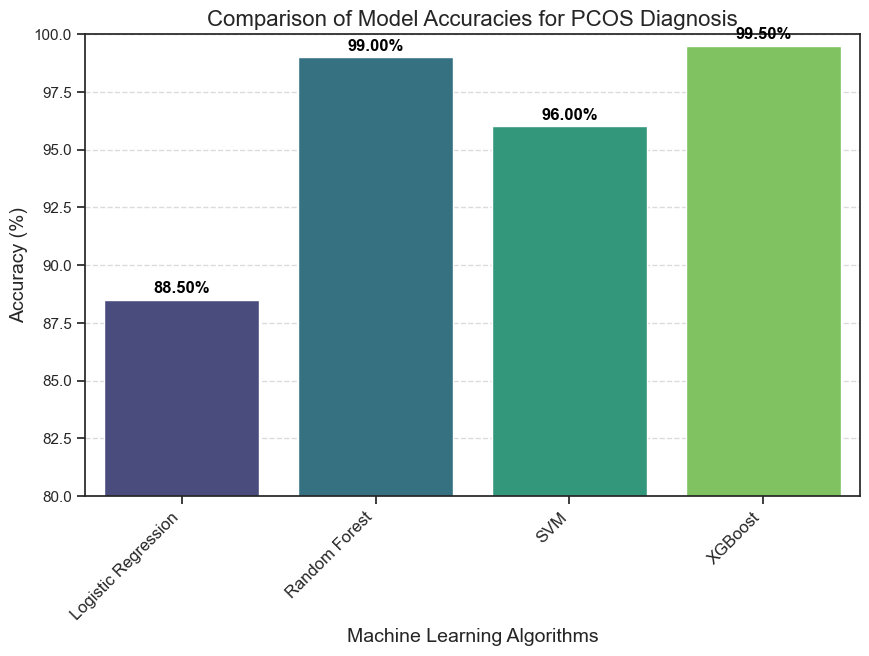

In [49]:
accuracy_results = {
    "Logistic Regression": 88.50,
    "Random Forest": 99.00,
    "SVM": 96.00,
    "XGBoost": 99.50
}

# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the barplot with a different color palette
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="viridis")

# Format the plot with labels and title
plt.xlabel("Machine Learning Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Comparison of Model Accuracies for PCOS Diagnosis", fontsize=16)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set y-axis limits for better visualization of the accuracy scores
plt.ylim(80, 100)

# Display the accuracy percentage on top of each bar
for index, value in enumerate(accuracy_results.values()):
    plt.text(index, value + 0.3, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Add grid lines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
